<a href="https://colab.research.google.com/github/ismailerbas/Projects-in-Machine-Learning-and-AI/blob/main/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Problem


In a period when the concepts of machine learning, data science, big data analysis and artificial intelligence were rapidly rising, it was unthinkable that the stock market, which is one of the most important financial instruments, was left out of this game. Here we will use Microsoft's stock price from 04/01/2015 to 04/01/2021. We will try to predict stock prices using this data. We will use sequential models because stock prediction depends on the past data and the trend that it follows and sequential models are great to process these information. The dataset link is : https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis  

Setting up Libraries

In [59]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
import os 
import keras 
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization,Activation,Bidirectional
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

Resources

1) First we need to use dense layer in keras to implement our fully connected 
layers link:https://keras.io/api/layers/core_layers/dense/

2) We define the metrics we use by using model.compile and select the mectrics from here: https://keras.io/api/metrics/

3) We will use the mean squared error for loss function becuse our dataset is regression problem. The link is here : https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

4) We will use Adam optimizer because it generally gives better results, it requires less parameters and the computation time is faster which is a good advantage. link:https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

5) We will use early stopping to overcome the overfitting. https://keras.io/api/callbacks/early_stopping/

6) We will also try dropout layers to overcome the overfitting. https://keras.io/api/layers/regularization_layers/dropout/

7) We will use regularization to add penalty to the loss function to overcome overfitting. https://keras.io/api/layers/regularizers/

8) We will use SimpleRNN, LTM and GRU layers from keras. https://www.tensorflow.org/api_docs/python/tf/keras/layers

The data


In [60]:

df = pd.read_csv('/content/drive/My Drive/mlp/Microsoft_Stock.csv')

Exploratory Data Analysis (EDA)

In [ ]:
# Here we can see a part of the data 
df.head()


,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
# The data shape is
df.shape


(1511, 6)

In [57]:
# We can see that the data has 6 attributes and 1511 price. 
# These data vere recorded every weekday when the market is open. The first column shows the price when the market opens and the second shows the highest value of the day and the third shows the lowest value. 
# The forth one shows the close price when the markets close and the last one shows the volume.

In [ ]:
# Next we check if there are NaN values in the data
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
# We can see that there are no null values, we can get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
# Since we just have numerical colums we can get the statistics about the dataset
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [ ]:
# From these results we can see that the mean values are similar which is understandable because they are following the same trend. 
# The standart deviations show that the price increased and decreased %50 of the mean value. 
# The volume seems to change 30% over the time from mean value

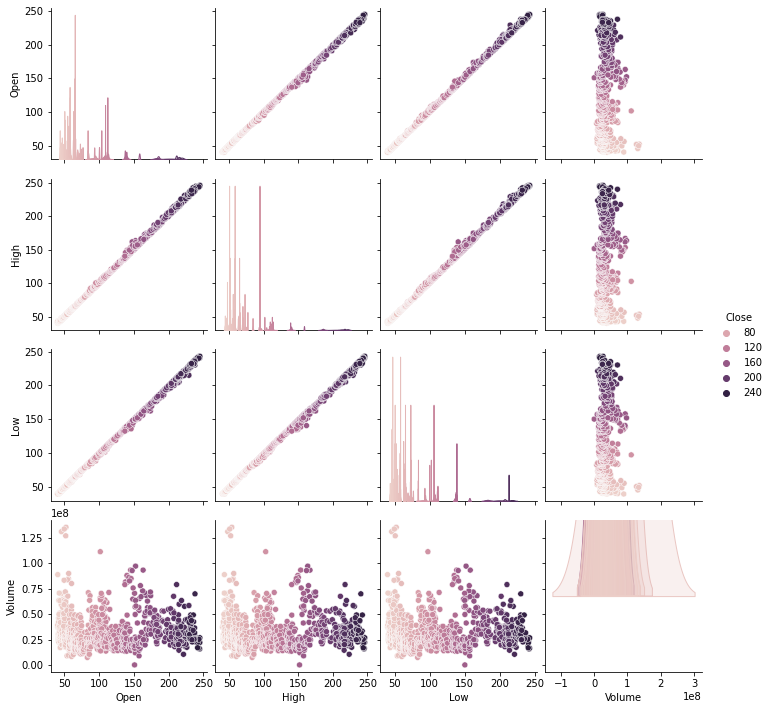

In [ ]:
# We can plot the relationships in the dataset
sns.pairplot(df, hue='Close')

In [ ]:
# We can see that linear correlation occurs between high low open and close. 

Text(0, 0.5, 'Open')

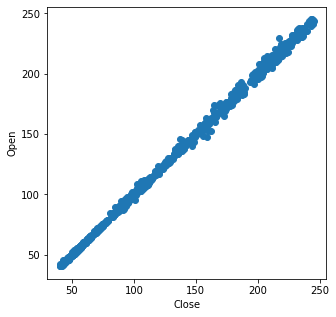

In [ ]:
# we can see correlation between close and open
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Close'], df['Open'])
ax.set_xlabel('Close')
ax.set_ylabel('Open')


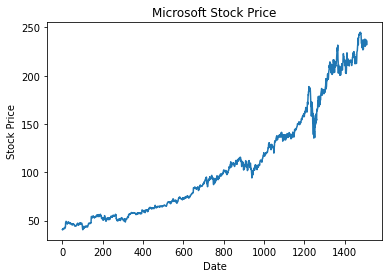

In [ ]:
# Next we can visualize the prices over time
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

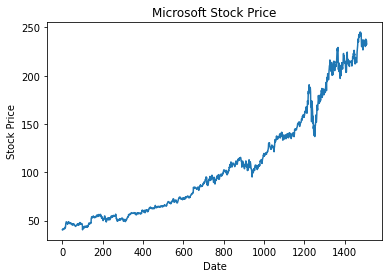

In [ ]:
plt.plot(df['Open'], label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

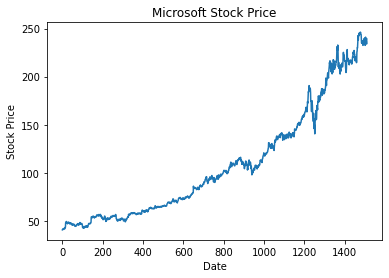

In [ ]:
plt.plot(df['High'], label='High Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

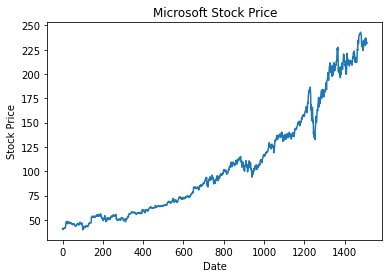

In [ ]:
plt.plot(df['Low'], label='Low Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

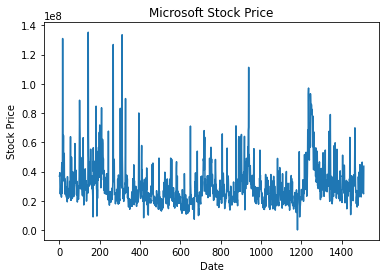

In [ ]:
plt.plot(df['Volume'], label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

In [ ]:
# We can see that the stock price of Microsoft follows an up trend over the years and people tend to buy the stocks over the years. Altough the daily volume doesn't change much the prices went up. 

In [61]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999775,0.999757,0.999541,0.054072
High,0.999775,1.000000,0.999622,0.999731,0.062573
Low,0.999757,0.999622,1.000000,0.999767,0.044514
Close,0.999541,0.999731,0.999767,1.000000,0.052153
Volume,0.054072,0.062573,0.044514,0.052153,1.000000


In [ ]:
# Lastly we can look to the correlation matrix between the features. We can see that they are highly correlated as expected. 
# We will use only close price because generally the close price is taken into account when predicting the price and in economical analyses. They are correlated so they are basically the same for the deep learning models.
# We will be predicting future close price so that we can invest on it.


Data partitioning 


In [ ]:
data = df["Close"]

data = data.values.reshape(-1,1)
data.shape
    

(1511, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) # We scale the databetween 0 and 1
dataset = scaler.fit_transform(data)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70) # Here we split the data into train and test sizes (70% and 30%)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test)) # We can see the train and test sizes

1057 454


In [ ]:
# convert an array of values into a dataset matrix

trainx, trainy, testx, testy = [], [],[], []   
for i in range(len(train)-1):
	
	trainx.append(train[i, :])
	trainy.append(train[i+1 , 0])
for i in range(len(test)-1):
	
	testx.append(test[i, :])
	testy.append(test[i+1 , 0])


In [ ]:
trainx

[array([0.00210064]),
 array([0.]),
 array([0.00615535]),
 array([0.00605765]),
 array([0.00552027]),
 array([0.00581339]),
 array([0.00698583]),
 array([0.00718124]),
 array([0.00664387]),
 array([0.00962384]),
 array([0.00913532]),
 array([0.00649731]),
 array([0.01279922]),
 array([0.01148021]),
 array([0.01319003]),
 array([0.01489985]),
 array([0.0370298]),
 array([0.03781143]),
 array([0.0433317]),
 array([0.04284319]),
 array([0.0407914]),
 array([0.04088911]),
 array([0.03883732]),
 array([0.0357108]),
 array([0.02926234]),
 array([0.03131412]),
 array([0.03644358]),
 array([0.0345872]),
 array([0.0344895]),
 array([0.03585735]),
 array([0.04118222]),
 array([0.03913043]),
 array([0.03771373]),
 array([0.03561309]),
 array([0.03561309]),
 array([0.03483146]),
 array([0.03229116]),
 array([0.03077675]),
 array([0.03575965]),
 array([0.03497802]),
 array([0.03209575]),
 array([0.03390327]),
 array([0.03238886]),
 array([0.0320469]),
 array([0.02965315]),
 array([0.02857841]),
 ar

In [ ]:
trainy

[0.0,
 0.006155349291646295,
 0.006057645334636069,
 0.005520273571079648,
 0.00581338544211038,
 0.006985832926233504,
 0.007181240840254011,
 0.006643869076697589,
 0.009623839765510483,
 0.009135319980459189,
 0.006497313141182209,
 0.012799218368343884,
 0.011480214948705436,
 0.013190034196384953,
 0.014899853444064498,
 0.037029799706888106,
 0.037811431362970216,
 0.04333170493404981,
 0.04284318514899854,
 0.04079140205178311,
 0.040889106008793336,
 0.03883732291157793,
 0.03571079628724963,
 0.029262335124572547,
 0.031314118221788007,
 0.036443575964826586,
 0.03458720078163163,
 0.03448949682462141,
 0.03585735222276504,
 0.04118221787982412,
 0.039130434782608664,
 0.037713727405959935,
 0.03561309233023935,
 0.03561309233023935,
 0.03483146067415732,
 0.03229115779189057,
 0.030776746458231585,
 0.035759648265754757,
 0.0349780166096727,
 0.03209574987787003,
 0.03390327308255983,
 0.03238886174890085,
 0.032046897899364934,
 0.02965315095261356,
 0.028578407425500746,
 0

In [ ]:
trainx = np.array(trainx)  # I converted the list objects into np arrays for easier use
trainy = np.array(trainy)
testx = np.array(testx)
testy = np.array(testy)


In [ ]:
trainx.shape

(1056, 1)

Model training and testing


In [ ]:
# First we start with defining 3 RNN layers and one fully connected layer for output  
model = Sequential()
model.add(SimpleRNN(128, return_sequences=True,kernel_regularizer="l1",
               input_shape=(1, 1)))  # returns a sequence of vectors of dimension 128 I used kernel regularizer l1 for overfitting protection
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(SimpleRNN(64, return_sequences=True,kernel_regularizer="l1"))  # returns a sequence of vectors of dimension 64 uses l1 kernel regularization
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(SimpleRNN(32,kernel_regularizer="l1"))  # return a single vector of dimension 32 with l1 kernel regularization
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(1, activation='relu'))
# I used 3 layers of RNN to increase the depth of the model which will help to look deeper to the data and learn better.
# I use mean squared error for loss function because this is a regression task it is most suitable. To describe the performance of the model we will use the mean absolute error metric. 
# Which will give us how close the prediction is to the actual value.
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3), # learning rate is another parameter that can be tuned to increase the accuracy. I used Adam optimizer 
              metrics=['mae']),
earlyStopping = EarlyStopping(monitor='val_loss',  # I added early stopping to the model for preventing overfitting
                              patience = 15,  # The patience value means that the model will stop if the validation loss repeats 15 times.
                              verbose = 0,
                              mode = 'auto')
# Below I save the best model and we can use this model later if we want to.
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [ ]:
history=model.fit(trainx, trainy,
          validation_split=0.2, # We split the training data by 80% train and 20% validation
          batch_size=64, epochs=1500, verbose=1, shuffle=True, callbacks=callback) # I choose the batch size 64 for start and we will change it for tuning and find optimal size. 
          # Another hyperparameter is number of epechs which can be optimized with early stopping. Here I defined 1500 epochs but it will stop at some point using the patience value.        

Epoch 1/1500
14/14 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0097 - val_loss: 0.0112 - val_mae: 0.0158
Epoch 2/1500
14/14 [==============================] - 0s 8ms/step - loss: 0.0110 - mae: 0.0092 - val_loss: 0.0112 - val_mae: 0.0104
Epoch 3/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.0111 - mae: 0.0080 - val_loss: 0.0112 - val_mae: 0.0097
Epoch 4/1500
14/14 [==============================] - 0s 12ms/step - loss: 0.0111 - mae: 0.0096 - val_loss: 0.0110 - val_mae: 0.0074
Epoch 5/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.0112 - mae: 0.0097 - val_loss: 0.0113 - val_mae: 0.0078
Epoch 6/1500
14/14 [==============================] - 0s 9ms/step - loss: 0.0111 - mae: 0.0083 - val_loss: 0.0111 - val_mae: 0.0080
Epoch 7/1500
14/14 [==============================] - 0s 8ms/step - loss: 0.0111 - mae: 0.0093 - val_loss: 0.0113 - val_mae: 0.0098
Epoch 8/1500
14/14 [==============================] - 0s 9ms/step - loss: 

In [ ]:
model.summary() # we can see the model here and we can see all the layers that we defined

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_33 (SimpleRNN)   (None, 1, 128)            16640     
                                                                 
 batch_normalization_39 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 activation_39 (Activation)  (None, 1, 128)            0         
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 1, 64)             12352     
                                                                 
 batch_normalization_40 (Bat  (None, 1, 64)            256       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 1, 64)           

In [ ]:
prediction=model.predict(testx)


15/15 [==============================] - 0s 3ms/step


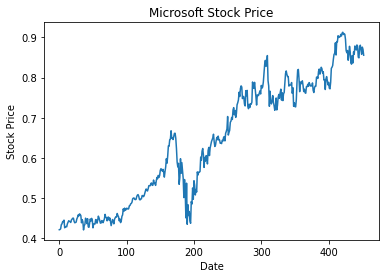

In [ ]:
plt.plot(prediction, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

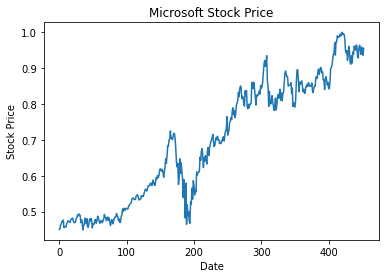

In [ ]:
plt.plot(testy, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

0.055381227341855764
0.02566934346841307


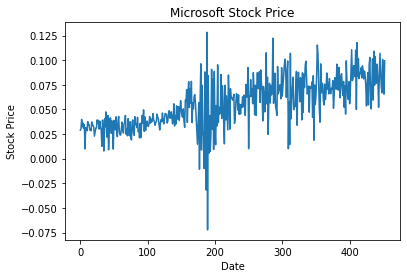

In [ ]:
testy = np.reshape(testy, (testy.shape[0], 1))
error=(testy-prediction)
plt.plot(error, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');
print(error.mean())
print(error.std())

In [ ]:
# We can see that the rnn predicted the future test data very good and the error is low but we can decrease the error by using more better models like lstm and gru

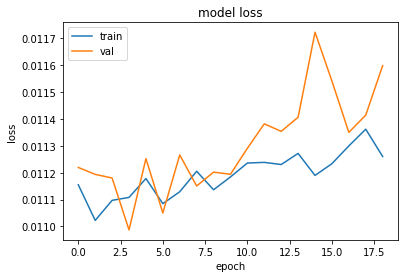

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

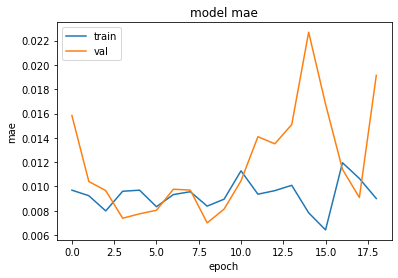

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we can see that the loss and mae is following almost the same trend and we can see that they are low.

In [ ]:
# First we start with defining a two fully connected layer nn  
model = Sequential()
model.add(LSTM(128, return_sequences=True,kernel_regularizer="l1",
               input_shape=(1, 1)))  # returns a sequence of vectors of dimension 128
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(LSTM(64, return_sequences=True,kernel_regularizer="l1"))  # returns a sequence of vectors of dimension 64
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(LSTM(32,kernel_regularizer="l1"))  # return a single vector of dimension 32
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3), 
              metrics=['mae']),
earlyStopping = EarlyStopping(monitor='val_loss',  # I added early stopping to the model for preventing overfitting
                              patience = 15,  # The patience value means that the model will stop if the validation loss repeats 15 times.
                              verbose = 0,
                              mode = 'auto')
# Below I save the best model and we can use this model later if we want to.
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [ ]:
history=model.fit(trainx, trainy,
          validation_split=0.2, # We split the training data by 80% train and 20% validation
          batch_size=64, epochs=1500, verbose=1, shuffle=True, callbacks=callback) # I choose the batch size 64. 
       
        

Epoch 1/1500
14/14 [==============================] - 0s 23ms/step - loss: 0.0554 - mae: 0.0161 - val_loss: 0.1148 - val_mae: 0.2424
Epoch 2/1500
14/14 [==============================] - 0s 19ms/step - loss: 0.0550 - mae: 0.0146 - val_loss: 0.1121 - val_mae: 0.2364
Epoch 3/1500
14/14 [==============================] - 0s 20ms/step - loss: 0.0550 - mae: 0.0131 - val_loss: 0.1145 - val_mae: 0.2417
Epoch 4/1500
14/14 [==============================] - 0s 23ms/step - loss: 0.0549 - mae: 0.0146 - val_loss: 0.1138 - val_mae: 0.2400
Epoch 5/1500
14/14 [==============================] - 0s 20ms/step - loss: 0.0549 - mae: 0.0098 - val_loss: 0.1104 - val_mae: 0.2343
Epoch 6/1500
14/14 [==============================] - 0s 18ms/step - loss: 0.0546 - mae: 0.0128 - val_loss: 0.1142 - val_mae: 0.2412
Epoch 7/1500
14/14 [==============================] - 0s 17ms/step - loss: 0.0549 - mae: 0.0148 - val_loss: 0.1086 - val_mae: 0.2300
Epoch 8/1500
14/14 [==============================] - 0s 14ms/step - 

In [ ]:
model.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 128)            66560     
                                                                 
 batch_normalization_33 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 1, 128)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             49408     
                                                                 
 batch_normalization_34 (Bat  (None, 1, 64)            256       
 chNormalization)                                                
                                                                 
 activation_34 (Activation)  (None, 1, 64)           

In [ ]:
prediction=model.predict(testx)


15/15 [==============================] - 0s 4ms/step


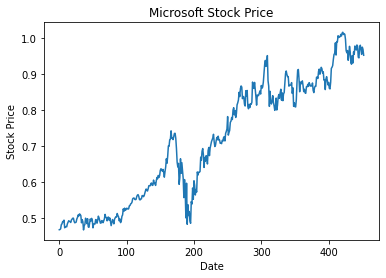

In [ ]:
plt.plot(prediction, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

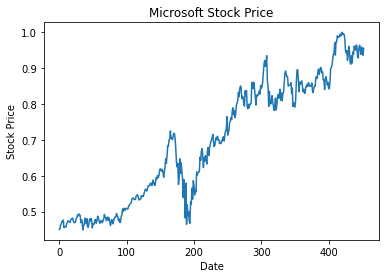

In [ ]:
plt.plot(testy, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

-0.016409416270161657
0.019041328199545463


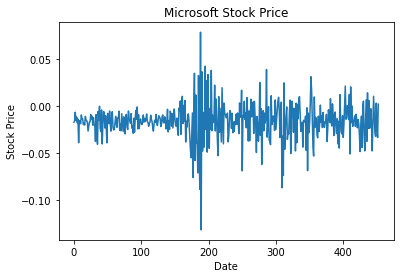

In [ ]:
testy = np.reshape(testy, (testy.shape[0], 1))
error=(testy-prediction)
plt.plot(error, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');
print(error.mean())
print(error.std())

In [ ]:
# here we try the LSTM instead of RNN and we can see the improvement in error

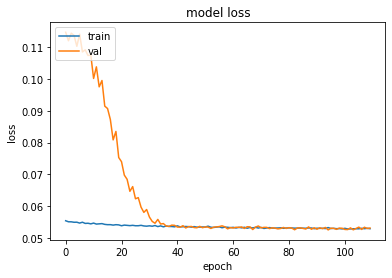

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

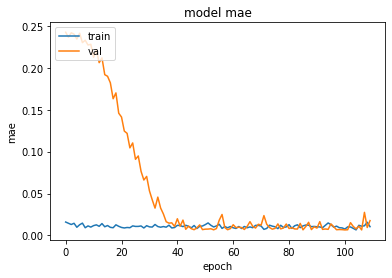

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we can see that the losses decrease and converge around 0.02. We can see that the fluctuations are gone and the model is more steady. LSTM is better than the RNN because it handles the memory longer than RNN and it can learn the temporal information better.

In [ ]:
# Next we will try the GRU and see the results

In [ ]:
# First we start with defining a two fully connected layer nn  
model = Sequential()
model.add(GRU(128, return_sequences=True,kernel_regularizer="l1",
               input_shape=(1, 1)))  # returns a sequence of vectors of dimension 128
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(GRU(64, return_sequences=True,kernel_regularizer="l1"))  # returns a sequence of vectors of dimension 64
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(GRU(32,kernel_regularizer="l1"))  # return a single vector of dimension 32
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3), # learning rate is another parameter that can be tuned to increase the accuracy.
              metrics=['mae']),
earlyStopping = EarlyStopping(monitor='val_loss',  # I added early stopping to the model for preventing overfitting
                              patience = 15,  # The patience value means that the model will stop if the validation loss repeats 15 times.
                              verbose = 0,
                              mode = 'auto')

modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [ ]:
history=model.fit(trainx, trainy,
          validation_split=0.2, # We split the training data by 80% train and 20% validation
          batch_size=64, epochs=1500, verbose=1, shuffle=True, callbacks=callback) # I choose the batch size 64.
        

Epoch 1/1500
14/14 [==============================] - 9s 162ms/step - loss: 21.4348 - mae: 0.1119 - val_loss: 19.4197 - val_mae: 0.3534
Epoch 2/1500
14/14 [==============================] - 0s 16ms/step - loss: 17.7474 - mae: 0.0782 - val_loss: 15.9139 - val_mae: 0.3534
Epoch 3/1500
14/14 [==============================] - 0s 17ms/step - loss: 14.3824 - mae: 0.0516 - val_loss: 12.7478 - val_mae: 0.3534
Epoch 4/1500
14/14 [==============================] - 0s 16ms/step - loss: 11.3700 - mae: 0.0498 - val_loss: 9.9443 - val_mae: 0.3533
Epoch 5/1500
14/14 [==============================] - 0s 17ms/step - loss: 8.7316 - mae: 0.0453 - val_loss: 7.5160 - val_mae: 0.3503
Epoch 6/1500
14/14 [==============================] - 0s 15ms/step - loss: 6.4623 - mae: 0.0347 - val_loss: 5.4526 - val_mae: 0.3498
Epoch 7/1500
14/14 [==============================] - 0s 15ms/step - loss: 4.5689 - mae: 0.0342 - val_loss: 3.7798 - val_mae: 0.3483
Epoch 8/1500
14/14 [==============================] - 0s 17ms

In [ ]:
model.summary() 

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            50304     
                                                                 
 batch_normalization_54 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 1, 128)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 64)             37248     
                                                                 
 batch_normalization_55 (Bat  (None, 1, 64)            256       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 1, 64)           

In [ ]:
prediction=model.predict(testx)


15/15 [==============================] - 1s 3ms/step


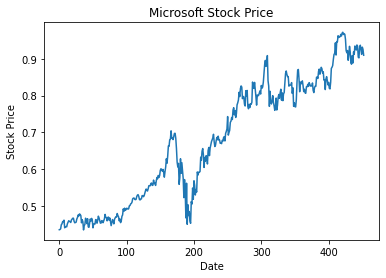

In [ ]:
plt.plot(prediction, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

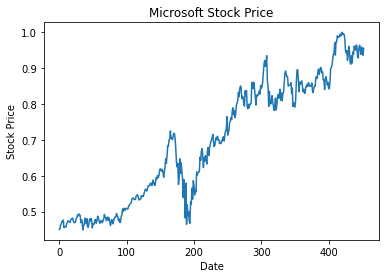

In [ ]:
plt.plot(testy, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

0.02113592196999235
0.01928646080315369


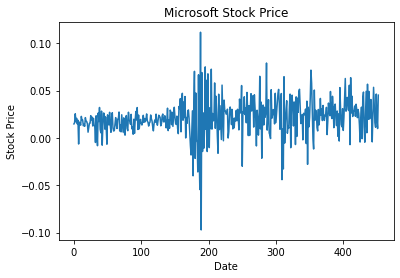

In [ ]:
testy = np.reshape(testy, (testy.shape[0], 1))
error=(testy-prediction)
plt.plot(error, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');
print(error.mean())
print(error.std())

In [ ]:
# We can see that the GRU was better than RNN but was slightly lower than the LSTM. That could be because  GRU is less complex than LSTM because it has less number of gates. So this dataset might be more suitable for more complexity and might require more gates to learn the dataset better.

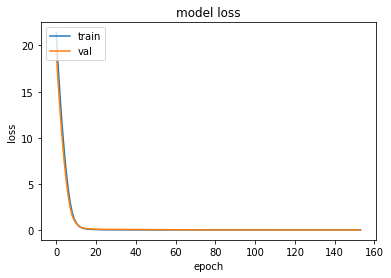

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

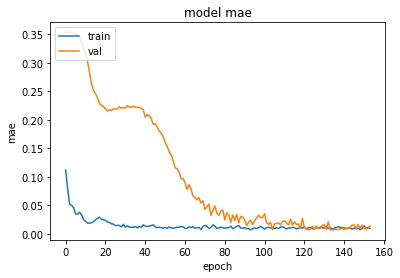

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we can see that the losses are almost equal in validation and training sets and the mae converges at around 0.01.

In [ ]:
# Next we try try a fully connected feedforward layer to see the score

In [ ]:
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(lr=1e-3), # learning rate is another parameter that can be tuned to increase the accuracy.
              metrics=['mae']),
earlyStopping = EarlyStopping(monitor='val_loss',  # I added early stopping to the model for preventing overfitting
                              patience = 15,  # The patience value means that the model will stop if the validation loss repeats 15 times.
                              verbose = 0,
                              mode = 'auto')
# Below I save the best model and we can use this model later if we want to.
modelCheckPoint = ModelCheckpoint(filepath='model.h5', 
                                  monitor='val_loss', 
                                  save_best_only=True, 
                                  verbose=0)
callback = [
  
    [earlyStopping,modelCheckPoint]
]

In [ ]:
history=model.fit(trainx, trainy,
          validation_split=0.2, # We split the training data by 80% train and 20% validation
          batch_size=64, epochs=1500, verbose=1, shuffle=True, callbacks=callback) # I choose the batch size 64.

Epoch 1/1500
14/14 [==============================] - 1s 18ms/step - loss: 0.1399 - mae: 0.3631 - val_loss: 0.0136 - val_mae: 0.1085
Epoch 2/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.1202 - mae: 0.3333 - val_loss: 0.0052 - val_mae: 0.0638
Epoch 3/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0915 - mae: 0.2830 - val_loss: 0.0030 - val_mae: 0.0395
Epoch 4/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.0604 - mae: 0.2189 - val_loss: 0.0205 - val_mae: 0.1345
Epoch 5/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0349 - mae: 0.1580 - val_loss: 0.0535 - val_mae: 0.2262
Epoch 6/1500
14/14 [==============================] - 0s 6ms/step - loss: 0.0257 - mae: 0.1301 - val_loss: 0.0782 - val_mae: 0.2757
Epoch 7/1500
14/14 [==============================] - 0s 5ms/step - loss: 0.0213 - mae: 0.1177 - val_loss: 0.0927 - val_mae: 0.3010
Epoch 8/1500
14/14 [==============================] - 0s 5ms/step - loss: 0

In [ ]:
model.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                128       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)               

In [ ]:
prediction=model.predict(testx)


15/15 [==============================] - 0s 2ms/step


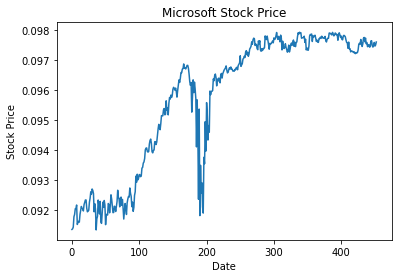

In [ ]:
plt.plot(prediction, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

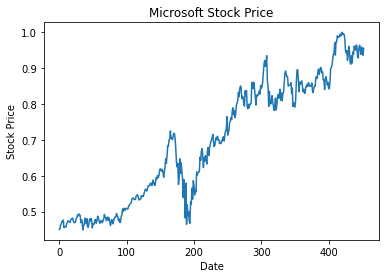

In [ ]:
plt.plot(testy, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');

0.5990805781831169
0.1689233240703616


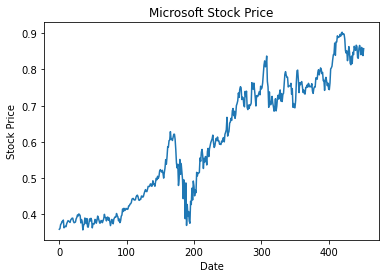

In [ ]:
testy = np.reshape(testy, (testy.shape[0], 1))
error=(testy-prediction)
plt.plot(error, label='Volume Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price');
print(error.mean())
print(error.std())

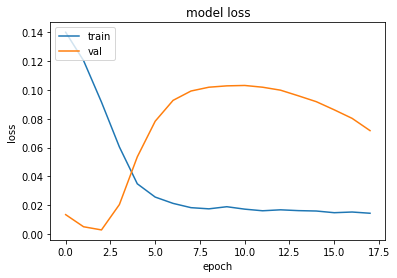

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

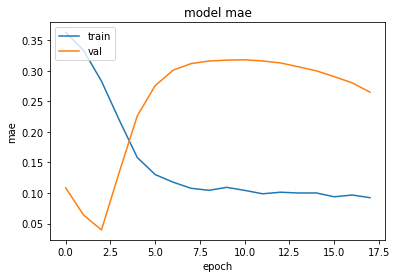

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# we can see that the feedforward network was not able to learn the dataset as good as the models above. That could be because recurrent networks have a "memory" whereas the feedforward networks lack of it. Recurrent networks have the ability to go back and learn more about the data. 

Word2vec


In [2]:
import io
import re
import string
import tqdm

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
#!pip uninstall gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

In [ ]:
#!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.0 MB/s 


In [10]:
from numpy.linalg import norm
from os import listdir
from os.path import isfile, join
filenames = [f for f in listdir("/content/drive/My Drive/mlp/lyrics") if isfile(join("/content/drive/My Drive/mlp/lyrics", f))]

In [11]:
filenames

['rihanna.txt',
 'radiohead.txt',
 'r-kelly.txt',
 'prince.txt',
 'paul-simon.txt',
 'patti-smith.txt',
 'nursery_rhymes.txt',
 'notorious_big.txt',
 'notorious-big.txt',
 'bob-marley.txt',
 'blink-182.txt',
 'bob-dylan.txt',
 'bjork.txt',
 'bieber.txt',
 'beatles.txt',
 'kanye-west.txt',
 'joni-mitchell.txt',
 'johnny-cash.txt',
 'jimi-hendrix.txt',
 'eminem.txt',
 'lil-wayne.txt',
 'nirvana.txt',
 'nicki-minaj.txt',
 'nickelback.txt',
 'missy-elliott.txt',
 'michael-jackson.txt',
 'leonard-cohen.txt',
 'lady-gaga.txt',
 'Kanye_West.txt',
 'kanye.txt',
 'lorde.txt',
 'ludacris.txt',
 'lin-manuel-miranda.txt',
 'Lil_Wayne.txt',
 'drake.txt',
 'dr-seuss.txt',
 'dolly-parton.txt',
 'dj-khaled.txt',
 'disney.txt',
 'cake.txt',
 'dickinson.txt',
 'bruno-mars.txt',
 'bruce-springsteen.txt',
 'janisjoplin.txt',
 'britney-spears.txt',
 'amy-winehouse.txt',
 'alicia-keys.txt',
 'al-green.txt',
 'adele.txt']

In this part I used song lyrics data from: https://www.kaggle.com/datasets/paultimothymooney/poetry. I merged all of the files from different artists and used to train my model. 

In [26]:
from numpy.linalg import norm
from os import listdir
from os.path import isfile, join

text="first "
for names in filenames:
    text += open('/content/drive/My Drive/mlp/lyrics/'+names, 'rb').read().decode(encoding='utf-8') # importing and appending all of the lyrics from txt files 

lines = text.split('\n')
sentences = []
for line in lines:
    line = re.sub(r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]','',line).strip() # in this line we remove the punctuation from the text
    
    tokens = re.findall(r'\b\w+\b', line) # tokenizer
    if len(tokens) > 1:
        sentences.append(tokens)

model = Word2Vec(sentences=sentences, batch_words=16 ) # Here we define our Word2vec model and define batch size 

In [30]:
len(text) # As we can see the lenght of the text is very big that will be useful for us because the model will know too many words

6776493

In [55]:
word1 = input("Please enter the first word: ") #First word as user input
first_word = model[word1]
word2 = input("Please enter the second word: ") # Second word as user input
second_word = model[word2]
cosine_similarity = np.dot(first_word, second_word)/(norm(first_word)*norm(second_word))
dissimilarity = 1-(1/(1+np.sqrt(sum(pow(a-b,2) for a, b in zip(first_word, second_word)))))
print("The Cosine Similarity score is: ",cosine_similarity)
print("The dissimilarity score is: ",dissimilarity)

Please enter the first word: man


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Please enter the second word: men
The Cosine Similarity score is:  0.26145512
The dissimilarity score is:  0.8851968027216094


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Lastly we take two words from the user and get the cosine similarity and Euclidean distance dissimilarity scores in return. I used Euclidean dissimilarity [1]. Euclidean formula calculates the distance, which will be smaller for more similar words. For example if the words are same then the distance will be 0 (as shown below). So we can see from the results that the words happy and math are not similar. Their similarity score is very low and dissimilarity score is very high.

In [44]:
word1 = input("Please enter the first word: ") #First word as user input
first_word = model[word1]
word2 = input("Please enter the second word: ") # Second word as user input
second_word = model[word2]
cosine_similarity = np.dot(first_word, second_word)/(norm(first_word)*norm(second_word))
dissimilarity = np.sqrt(sum(pow(a-b,2) for a, b in zip(first_word, second_word)))
print("The Cosine Similarity score is: ",cosine_similarity)
print("The dissimilarity score is: ",dissimilarity)

Please enter the first word: people


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Please enter the second word: people
The Cosine Similarity score is:  1.0
The dissimilarity score is:  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


[1] Witten, Ian H., and Eibe Frank. "Data mining: practical machine learning tools and techniques with Java implementations." Acm Sigmod Record 31.1 (2002): 76-77.
